# [35 pts] Visualizing Data


### [5 pts] Load the data + statistics

- load the dataset
- display the first few rows of the data


In [ ]:
import pandas as pd
data = pd.read_csv("https://drive.google.com/uc?id=1Wa5ixqnsckyQQhb1Ap4wl37mSgnPI12F&export=download")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- pull up info on the data type for each of the data fields. Will any of these be problemmatic feeding into your model (you may need to do a little research on this)? Discuss:

Something about the names being non-numeric with thousands of possibilities, none of which are relevant to this analysis, since we are not analyzing something like the most popular baby names.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*All the data fields with data type "object" (name, host_name, neighbourhood, neighborhood_group, room_type, last_review) could be problematic later on. Because their data types are unclear to us. It could possibly mean that the data type is messed up in some fields, or there are some empty values.*

- drop the following columns: name, host_id, host_name, last_review, and reviews_per_month
- display a summary of the statistics of the loaded data

In [ ]:
data_new = data.drop(columns = ['name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'])

In [ ]:
data_new.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


### [5 pts] Boxplot 3 features of your choice

- plot [boxplots](https://chartio.com/learn/charts/box-plot-complete-guide/) for 3 features of your choice

<Axes: >

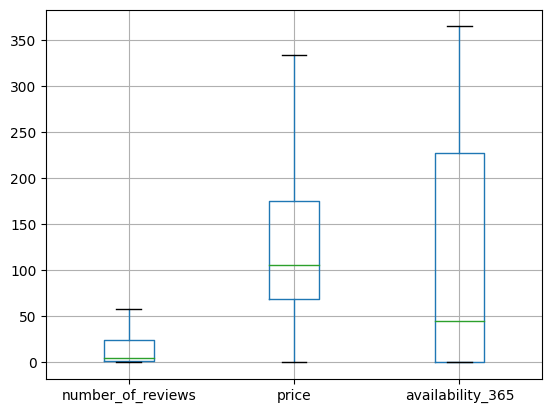

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
data_new.boxplot(column = ['number_of_reviews', 'price','availability_365'], showfliers = False)

- describe what you expected to see with these features and what you actually observed

*This question should be open-ended, such as some observations, e.g.The range varies a lot, plus, long tail distribution, etc.*

Looks like a lot of the other tickers dont have the best variablility in comparison to availability and price.

### [10 pts] Plot average price of a listing per neighbourhood_group

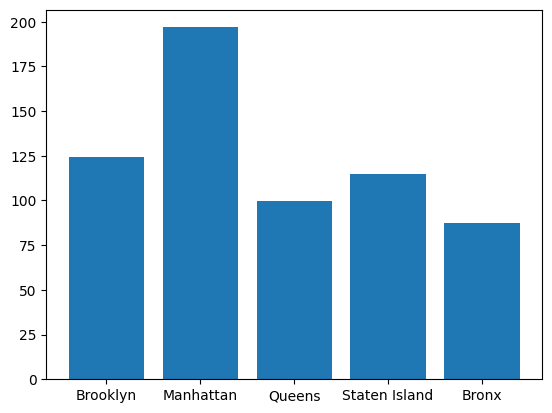

In [ ]:
grouped = data_new.groupby('neighbourhood_group')

temp = dict()

for ng in data_new['neighbourhood_group'].unique():
  temp[ng] = data_new[data_new['neighbourhood_group'] == ng]['price'].mean()

plt.bar(temp.keys(), temp.values())
plt.show()

- describe what you expected to see with these features and what you actually observed

*This question should be open-ended, they can talk about things such as "expecting the rooms with higher price to be have fewer reviews / more days available, but this is not the case". Or "location affects the price" and indeed it does.*

- So we can see different neighborhoods have dramatically different pricepoints, but how does the price breakdown by range. To see let's do a histogram of price by neighborhood to get a better sense of the distribution.

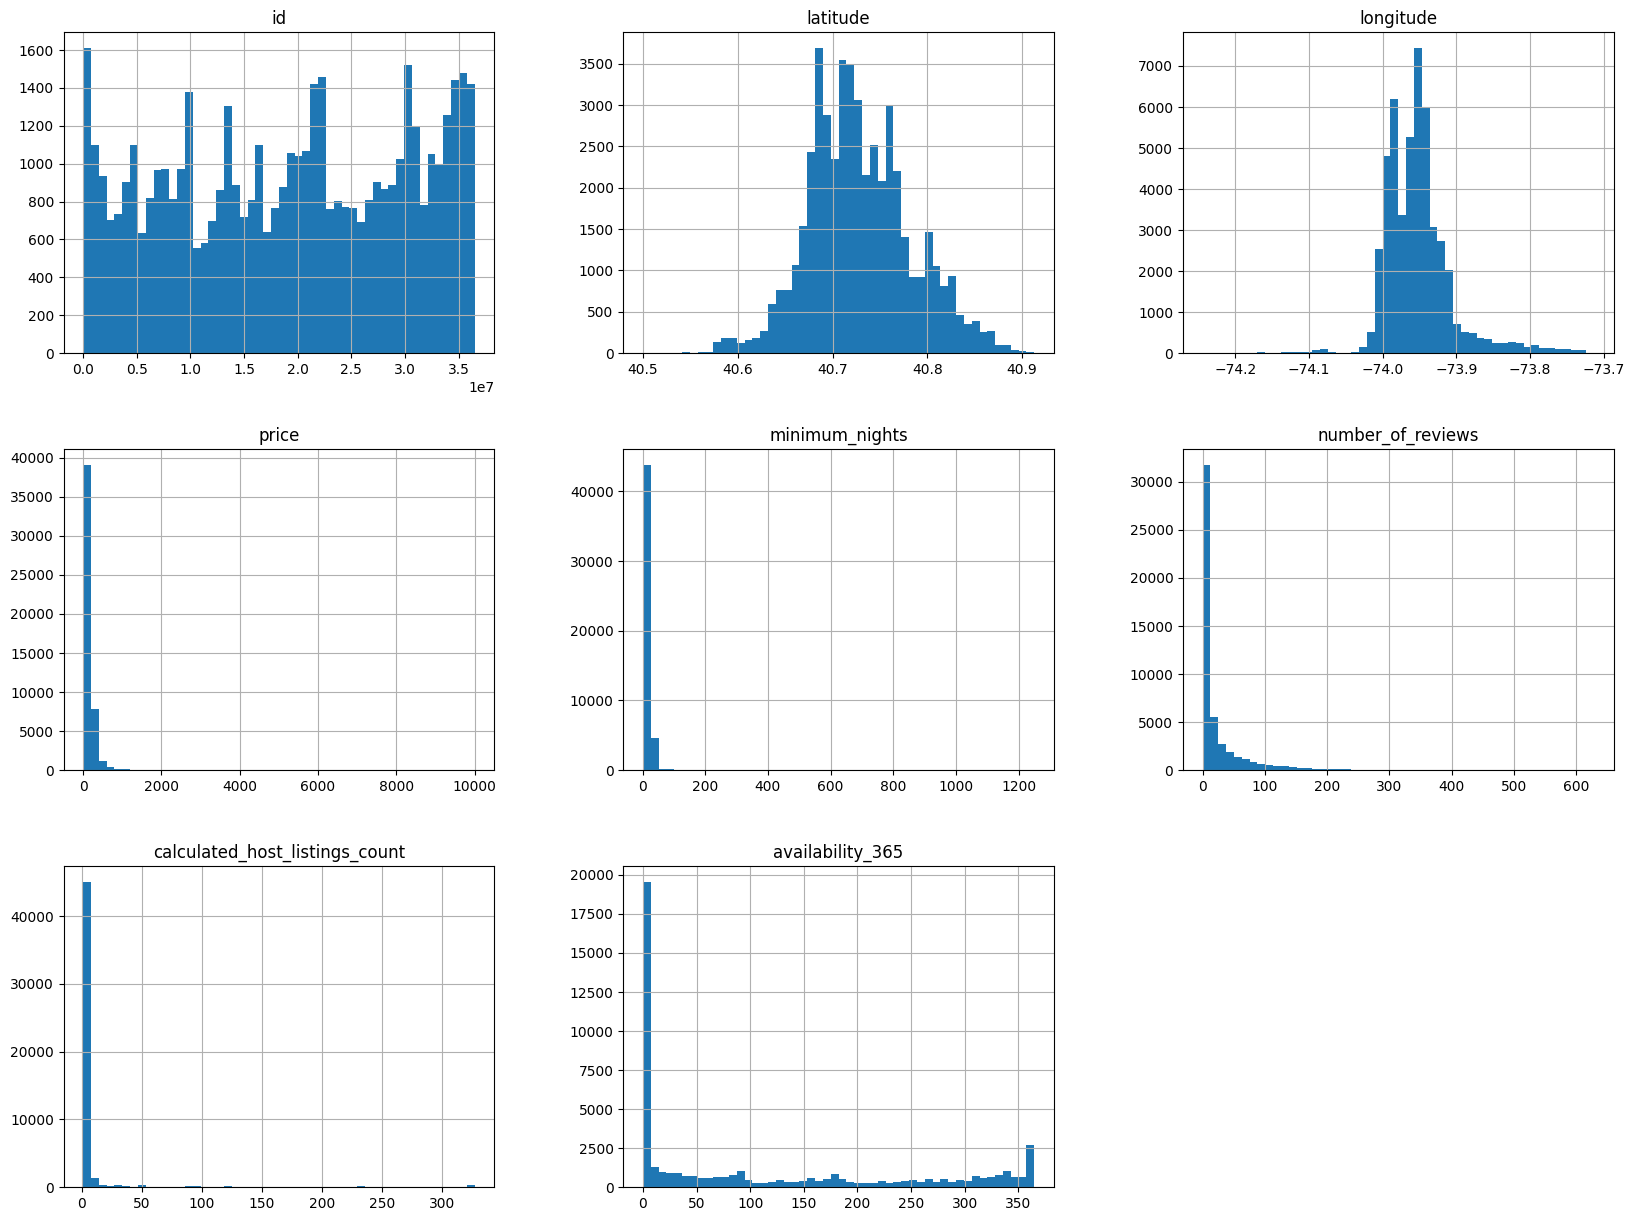

In [ ]:
import numpy as np

# for neighborhood in set(data_new["neighbourhood_group"]):
#   data_tmp = data_new[data_new["neighbourhood_group"] == neighborhood]
#   data_tmp = data_tmp[~data_tmp["price"].isna()]
#   n_chunks = 10
#   bins = list()
#   labels = list()
#   granularity = 50
#   for i in range(n_chunks):
#     bins.append(i * granularity)
#     labels.append(i)
#   bins.append(np.inf)
#   data_tmp["price_cut"] = pd.cut(data_tmp["price"],
#                                bins=bins,
#                                labels=labels)

#   data_tmp["price_cut"].hist()
#   plt.title(neighborhood)
#   plt.show()


data_new.hist(bins=50, figsize=(20,15))

plt.show()



### [5 pts] Plot map of airbnbs throughout New York (if it gets too crowded take a subset of the data, and try to make it look nice if you can :) ).

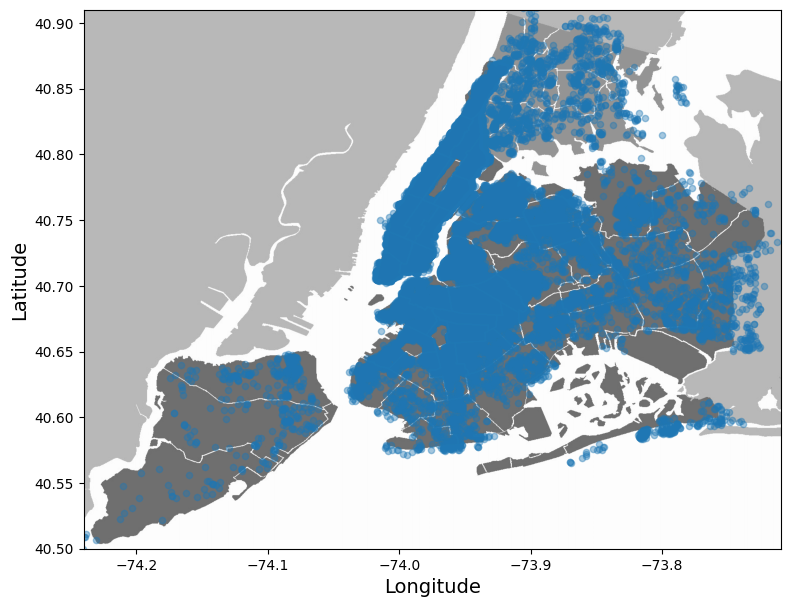

In [ ]:
images_path = os.path.join('./', "images")
os.makedirs(images_path, exist_ok=True)
filename = "newyork.png"

import matplotlib.image as mpimg
newyork_img=mpimg.imread(os.path.join(images_path, filename))
ax = data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7), alpha=0.4)
plt.imshow(newyork_img, extent=[-74.24, -73.71, 40.50, 40.91])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.show()

# This one was done for me it seems?


### [5 pts] Plot average price of room types who have availability greater than 180 days and neighbourhood_group is Manhattan

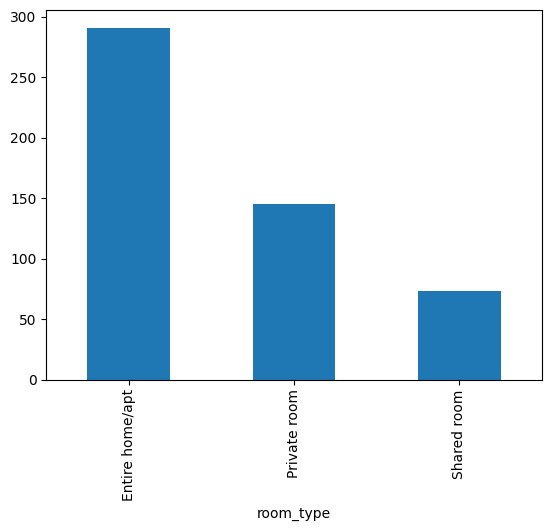

In [ ]:
data_temp = data_new[data_new["neighbourhood_group"] == "Manhattan"]
data_temp_180 = data_temp[data_temp["availability_365"] > 180].groupby('room_type').mean(numeric_only=True)
data_temp_180["price"].plot(kind="bar")
plt.show()

### [5 pts] Plot correlation matrix
- which features have positive correlation?
- which features have negative correlation?

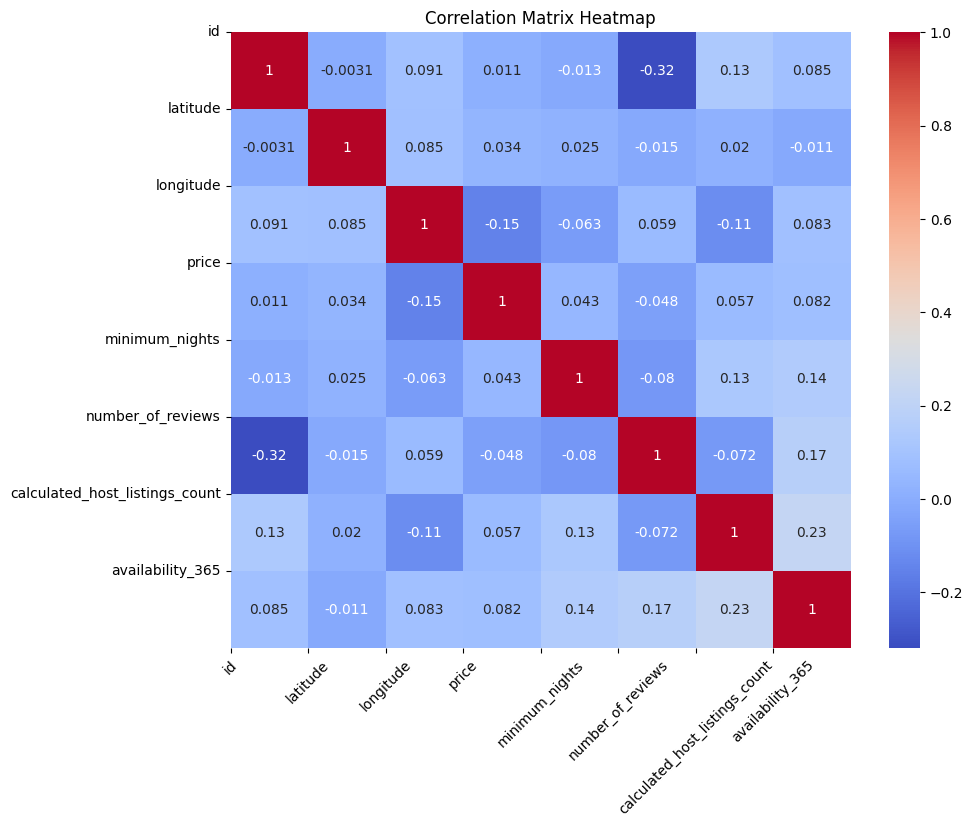

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for better visualization

# Assuming data_new is your DataFrame and numeric_only=True filters numeric columns
corr_matrix = data_new.corr(numeric_only=True)

# Sort correlations related to "price"
sorted_correlations = corr_matrix["price"].sort_values(ascending=False)

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Annotate cells with correlation values

# Customize labels and ticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title('Correlation Matrix Heatmap')
plt.show()

Saving figure scatter_matrix_plot


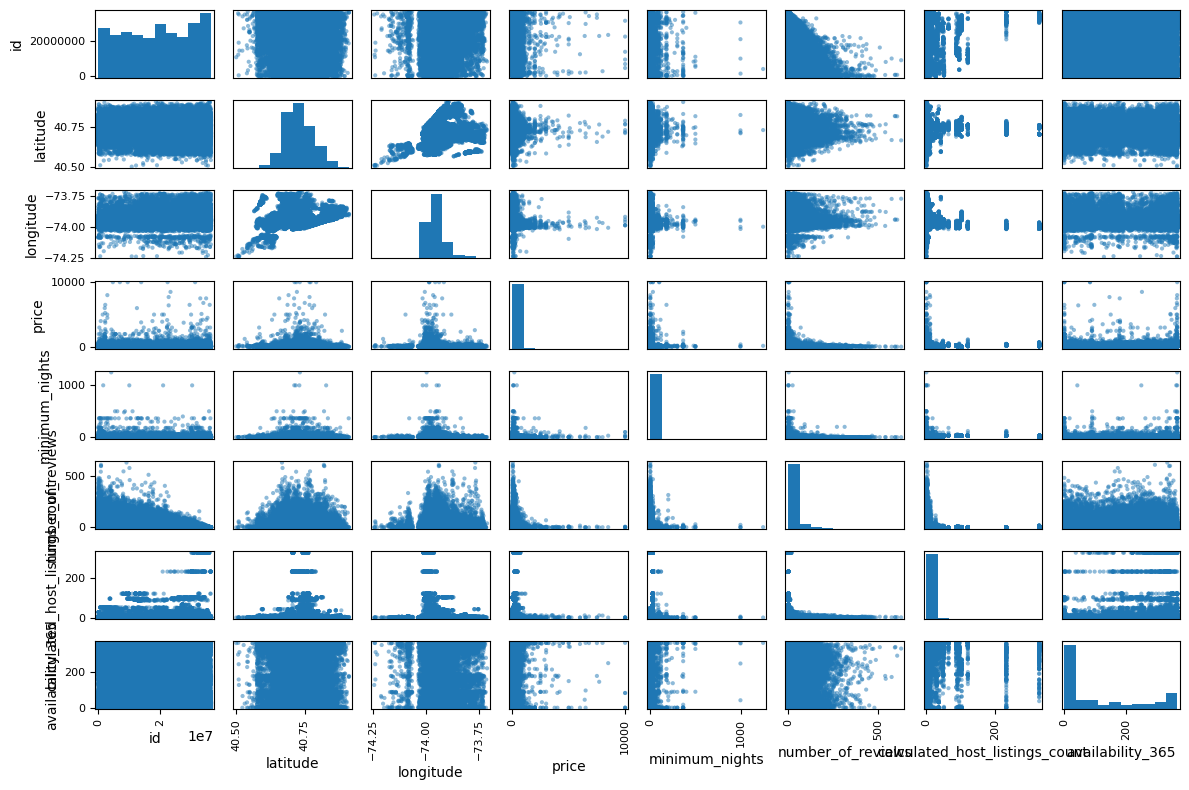

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_new, figsize=(12, 8))
save_fig("scatter_matrix_plot")

*(open-ended question, any findings should work)*

# [30 pts] Prepare the Data

### [5 pts] Augment the dataframe with two other features which you think would be useful

> Hint: Do Not Use Label (price) to Augment Features

In [ ]:
new_data = data.drop(columns = ['name', 'host_id', 'host_name', 'last_review'],axis = 1)
new_data.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
data_new["average_num_review_per_listing"] = data_new["number_of_reviews"] / data_new["calculated_host_listings_count"]
data_new['distance_from_center'] = np.sqrt(data_new['latitude']**2 + data_new['longitude']**2)

### [5 pts] Impute any missing feature with a method of your choice, and briefly discuss why you chose this imputation method

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  average_num_review_per_listing  48895 non-null  float64
 12  distance_from_center            

Had the most NA values in the dataset. Most likely useful if imputed.

### [15 pts] Data Preparation

> Either using sklearn mixins, or anyway to create ndarray from scratch, is fine.

> As long as a feature matrix pf shape (N, D) and a label vertor of shape (N,) is prepared

In [ ]:
import numpy as np

features = ["neighbourhood", "neighbourhood_group", "room_type"]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in features:
  le.fit(data_new[i])
  data_new[i]=le.transform(data_new[i])

data_prepared = data_new.drop("price", axis=1).to_numpy()

print(data_prepared.shape)
print(data_new['price'].shape)

(48895, 12)
(48895,)


### [5 pts] Set aside 20% of the data as test test (80% train, 20% test).

In [ ]:
from sklearn.model_selection import train_test_split
data_target = data_new["price"]
train, test, target, target_test = train_test_split(data_prepared, data_target, test_size=0.2, random_state=0)

# [15 pts] Fit a model of your choice

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using MSE.
Provide both test and train set MSE values.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train, target)

data = test
labels = target_test

print("Predictions:", lin_reg.predict(data)[:5])
print("Actual labels:", list(labels)[:5])

Predictions: [250.66183904 240.4129302  199.05021554 108.53048172 157.90580094]
Actual labels: [225, 649, 300, 26, 125]


In [ ]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(test)
mse = mean_squared_error(target_test, preds)
rmse = np.sqrt(mse)
rmse

221.31805766243338

In [ ]:







































# ignore me!